# Objetivo

Comparar modelos de supervisados a través de la aplicación de algoritmos de predicción de precios de automóviles determinando el estadístico del error cuadrático medio (*rmse*).

# Descripción

-   Se cargan los datos previamente preparados de la dirección <https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/CarPrice_Assignment_Numericas_Preparado.csv>

-   Se crean datos de entrenamiento al 80%

-   Se crean datos de validación al 20%

-   Se crea el modelo regresión múltiple con datos de entrenamiento

    -   Con este modelo se responde a preguntas tales como:

        -   ¿cuáles son variables que están por encima del 90% de confianza como predictores?,

        -   ¿Cuál es el valor de *R Square Adjusted* o que tanto representan las variables dependientes al precio del vehículo?

    -   Se generan predicciones con datos de validación

    -   Se determina el estadístico *RMSE* para efectos de comparación

-   Se crea el modelo árboles de regresión con los datos de entrenamiento

    -   Se identifica la importancia de las variables sobre el precio

    -   Se visualiza el árbol de regresión y sus reglas de asociación

-   Se hacen predicciones con datos de validación

-   Se determinar el estadístico *RMSE* para efectos de comparación

-   Se construye el modelo bosques aleatorios con datos de entrenamiento y con 20 árboles simulados

    -   Se identifica la importancia de las variables sobre el precio

    -   Se generan predicciones con datos de validación

    -   Se determina el estadístico RMSE para efectos de comparación

-   Al final del caso, se describe una interpretación personal

# Desarrollo

## Cargar librerías

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
# Preprocesado y moYdelado
from sklearn.model_selection import train_test_split
# Estadisticos y lineal múltiple
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial
# Arbol de regresion
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Metricas
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score


## Cargar datos

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/CarPrice_Assignment_Numericas_Preparado.csv")
datos

,Unnamed: 0,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## Exploración de datos


In [3]:
print("Observaciones y variables: ", datos.shape)
print("Columnas y tipo de dato")
# datos.columns
datos.dtypes

Observaciones y variables:  (205, 16)
Columnas y tipo de dato


Unnamed: 0            int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## Limpiar datos

Dejar solo las variables necesarias:

'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'


In [4]:
datos = datos[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
datos.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
datos


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


### Datos de entrenamiento y validación

Datos de entrenamiento al 80% de los datos y 20% los datos de validación. Semilla 1287

In [6]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos.drop(columns = "price"), datos['price'],train_size = 0.80,  random_state = 2022)


#### Datos de entrenamiento


In [7]:
X_entrena


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
152,1,95.7,158.7,63.6,54.5,2015,92,3.05,3.03,9.0,62,4800,31,38
185,2,97.3,171.7,65.5,55.7,2212,109,3.19,3.40,9.0,85,5250,27,34
162,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70,4800,28,34
47,0,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,8.1,176,4750,15,19
163,1,94.5,168.7,64.0,52.6,2169,98,3.19,3.03,9.0,70,4800,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,9.0,85,5250,27,34
177,-1,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,4200,27,32
112,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,95,4150,28,33
173,-1,102.4,175.6,66.5,54.9,2326,122,3.31,3.54,8.7,92,4200,29,34


#### Datos de validación


In [8]:
X_valida


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
36,0,96.5,157.1,63.9,58.3,2024,92,2.92,3.410,9.2,76,6000,30,34
198,-2,104.3,188.8,67.2,56.2,3045,130,3.62,3.150,7.5,162,5100,17,22
102,0,100.4,184.6,66.5,56.1,3296,181,3.43,3.270,9.0,152,5200,17,22
146,0,97.0,173.5,65.4,53.0,2290,108,3.62,2.640,9.0,82,4800,28,32
79,1,93.0,157.3,63.8,50.8,2145,98,3.03,3.390,7.6,102,5500,24,30
32,1,93.7,150.0,64.0,52.6,1837,79,2.91,3.070,10.1,60,5500,38,42
107,0,107.9,186.7,68.4,56.7,3020,120,3.46,3.190,8.4,97,5000,19,24
180,-1,104.5,187.8,66.5,54.1,3131,171,3.27,3.350,9.2,156,5200,20,24
127,3,89.5,168.9,65.0,51.6,2756,194,3.74,2.900,9.5,207,5900,17,25
149,0,96.9,173.6,65.4,54.9,2650,108,3.62,2.640,7.7,111,4800,23,23


## Modelos Supervisados

### Modelo de regresión lineal múltiple. (RM)

Se construye el modelo de regresión lineal múltiple (rm)

In [9]:
modelo_rm = LinearRegression()
 
modelo_rm.fit(X_entrena,Y_entrena)

LinearRegression()

#### Coeficientes

Solo se muestran los coeficientes de: $\beta_1, \beta_2, ...\beta_n$


In [10]:
modelo_rm.coef_


array([ 9.52673247e+01,  1.81953839e+02, -1.28460128e+02,  2.59733294e+02,
        1.73000745e+02,  4.28258282e+00,  1.06140749e+02, -8.55114242e+02,
       -3.19867165e+03,  2.59655471e+02,  2.92332989e+01,  2.06775583e+00,
       -4.56614472e+02,  3.82529624e+02])

-   En modelos lineales múltiples el estadístico *Adjusted R-squared*: 0.8347 significa que las variables independientes explican aproximadamente el 83.47% de la variable dependiente precio.


In [11]:
print(modelo_rm.score(X_entrena, Y_entrena))


0.8347922699728583


#### Predicciones del modelo rm


In [12]:
predicciones_rm = modelo_rm.predict(X_valida)
print(predicciones_rm[:-1])

[ 8868.95979292 16715.53931972 23107.53653894  8818.03421416
  8623.47306273  5461.51958231 15048.03395087 20678.17706935
 26577.0976254  10007.94335078  7167.58858707  8902.49607572
 19625.68457485  8829.47097854 19927.5491719   5757.26535678
  6290.35140508 17189.29706731  6650.17766836 10005.933005
 22820.3487011   7059.04332282 18423.78105848 25736.16593187
 12360.08359525 18730.60224629  7661.73706868 17339.95676112
 37325.85810799 13165.15590746 18902.21907465 15028.83777249
  8237.19412365  8338.33771142 11241.64527253 28938.56728162
 34898.22431444  5502.18614768 39070.50660777 18966.14430163]


#### Tabla comparativa

In [13]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_rm.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
36           0       96.5      157.1      63.9       58.3        2024   
198         -2      104.3      188.8      67.2       56.2        3045   
102          0      100.4      184.6      66.5       56.1        3296   
146          0       97.0      173.5      65.4       53.0        2290   
79           1       93.0      157.3      63.8       50.8        2145   
32           1       93.7      150.0      64.0       52.6        1837   
107          0      107.9      186.7      68.4       56.7        3020   
180         -1      104.5      187.8      66.5       54.1        3131   
127          3       89.5      168.9      65.0       51.6        2756   
149          0       96.9      173.6      65.4       54.9        2650   
43           0       94.3      170.7      61.8       53.5        2337   
40           0       96.5      175.4      62.5       54.1        2372   
203         -1      109.1      188.8      68.9     

#### RMSE modelo de rm


In [14]:
rmse_rm = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_rm,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_rm}")

El error (rmse) de test es: 3703.892330296178


In [15]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones_rm)))


Root Mean Squared Error RMSE: 3703.892330296178


### Modelo de árbol de regresión (AR)

Se construye el modelo de árbol de regresión (ar)

In [17]:
modelo_ar = DecisionTreeRegressor(
            #max_depth         = 3,
            random_state      = 1287 
          )

Entrenar el modelo


In [18]:
modelo_ar.fit(X_entrena, Y_entrena)


DecisionTreeRegressor(random_state=1287)

#### Visualización de árbol de regresión


Profundidad del árbol: 14
Número de nodos terminales: 152


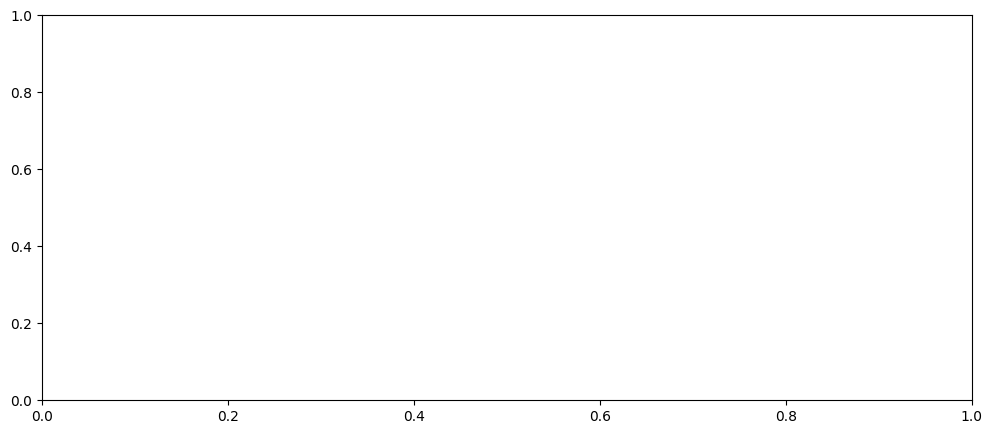

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
print(f"Profundidad del árbol: {modelo_ar.get_depth()}")
print(f"Número de nodos terminales: {modelo_ar.get_n_leaves()}")

In [21]:
plot = plot_tree(
            decision_tree = modelo_ar,
            feature_names = datos.drop(columns = "price").columns,
            class_names   = 'price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )


Reglas de asociación del árbol


In [22]:
texto_modelo = export_text(
                    decision_tree = modelo_ar,
                    feature_names = list(datos.drop(columns = "price").columns)
               )
print(texto_modelo)

|--- enginesize <= 182.00
|   |--- curbweight <= 2697.50
|   |   |--- curbweight <= 2291.50
|   |   |   |--- citympg <= 29.50
|   |   |   |   |--- symboling <= 2.50
|   |   |   |   |   |--- boreratio <= 3.43
|   |   |   |   |   |   |--- compressionratio <= 9.20
|   |   |   |   |   |   |   |--- carlength <= 168.10
|   |   |   |   |   |   |   |   |--- curbweight <= 2134.00
|   |   |   |   |   |   |   |   |   |--- compressionratio <= 8.30
|   |   |   |   |   |   |   |   |   |   |--- value: [7957.00]
|   |   |   |   |   |   |   |   |   |--- compressionratio >  8.30
|   |   |   |   |   |   |   |   |   |   |--- value: [8358.00]
|   |   |   |   |   |   |   |   |--- curbweight >  2134.00
|   |   |   |   |   |   |   |   |   |--- boreratio <= 3.17
|   |   |   |   |   |   |   |   |   |   |--- curbweight <= 2262.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- curbweight >  2262.50
|   |   |   |   |   |   |   |   |   |   |

#### Importancia de los predictores


In [23]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "price").columns, 
                            'importancia': modelo_ar.feature_importances_}
                            )
                            
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo


,predictor,importancia
6,enginesize,0.656853
5,curbweight,0.256059
12,citympg,0.027734
11,peakrpm,0.013483
4,carheight,0.007878
3,carwidth,0.007537
8,stroke,0.007121
0,symboling,0.006559
10,horsepower,0.005991
1,wheelbase,0.005700


Estos sería los predictores más importantes para el modelo de árbol de regresión *enginesize, curbweight, peakrpm, carheight y wheelbase*


In [24]:
predicciones_ar = modelo_ar.predict(X = X_valida)
predicciones_ar

array([ 6488. , 18950. , 13499. ,  7603. ,  8558. ,  5572. , 16630. ,
       15750. , 32528. , 11259. ,  8499. ,  6989. , 16845. ,  6692. ,
       22625. ,  8916.5,  8058. , 15250. ,  6229. ,  8195. , 17199. ,
        7738. , 16630. , 25552. ,  8921. , 16900. ,  6692. , 18150. ,
       30760. , 16925. , 12440. , 12764. , 11395. ,  7788. , 11395. ,
       30760. , 36000. ,  6488. , 30760. , 16900. ,  5572. ])

#### Tabla comparativa


In [25]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_ar.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
36           0       96.5      157.1      63.9       58.3        2024   
198         -2      104.3      188.8      67.2       56.2        3045   
102          0      100.4      184.6      66.5       56.1        3296   
146          0       97.0      173.5      65.4       53.0        2290   
79           1       93.0      157.3      63.8       50.8        2145   
32           1       93.7      150.0      64.0       52.6        1837   
107          0      107.9      186.7      68.4       56.7        3020   
180         -1      104.5      187.8      66.5       54.1        3131   
127          3       89.5      168.9      65.0       51.6        2756   
149          0       96.9      173.6      65.4       54.9        2650   
43           0       94.3      170.7      61.8       53.5        2337   
40           0       96.5      175.4      62.5       54.1        2372   
203         -1      109.1      188.8      68.9     

#### RMSE modelo de ar


In [26]:
rmse_ar = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_ar,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_ar}")

El error (rmse) de test es: 3766.342981091806


In [27]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones_ar)))


Root Mean Squared Error RMSE: 3766.342981091806


#### Modelo de bosques aleatorios (RF)

Se construye el modelo de árbol de regresión (ar). Semilla 2022 y 20 árboles de entrenamiento

In [28]:
modelo_rf = RandomForestRegressor(n_estimators = 20, random_state = 2022)
modelo_rf.fit(X_entrena, Y_entrena)

RandomForestRegressor(n_estimators=20, random_state=2022)

In [29]:
predicciones_rf = modelo_rf.predict(X_valida)
predicciones_rf

array([ 7221.3       , 17313.25      , 15198.55      ,  8344.125     ,
        8148.3       ,  5997.65833333, 16042.3       , 16319.15      ,
       32770.1       , 13142.31666667,  8251.        ,  9378.7       ,
       17923.7       ,  7193.4       , 19358.        ,  8454.35625   ,
        8138.45      , 13321.575     ,  5722.45      ,  8594.4       ,
       18117.65      ,  7528.5       , 16760.675     , 28334.2       ,
        9723.4       , 16598.2       ,  7032.6       , 19354.52505   ,
       35721.9       , 15169.1       , 15848.925     , 13572.8       ,
       11598.2       ,  7746.55      , 11859.95      , 36633.05      ,
       36368.65      ,  6461.85      , 35681.5       , 16598.2       ,
        5827.19375   ])

In [30]:

comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion = predicciones_rf.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
36           0       96.5      157.1      63.9       58.3        2024   
198         -2      104.3      188.8      67.2       56.2        3045   
102          0      100.4      184.6      66.5       56.1        3296   
146          0       97.0      173.5      65.4       53.0        2290   
79           1       93.0      157.3      63.8       50.8        2145   
32           1       93.7      150.0      64.0       52.6        1837   
107          0      107.9      186.7      68.4       56.7        3020   
180         -1      104.5      187.8      66.5       54.1        3131   
127          3       89.5      168.9      65.0       51.6        2756   
149          0       96.9      173.6      65.4       54.9        2650   
43           0       94.3      170.7      61.8       53.5        2337   
40           0       96.5      175.4      62.5       54.1        2372   
203         -1      109.1      188.8      68.9     

In [31]:
rmse_rf = mean_squared_error(
        y_true  = Y_valida,
        y_pred  = predicciones_rf,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 2646.5187973672428


In [32]:
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(Y_valida, predicciones_rf)))


Root Mean Squared Error RMSE: 2646.5187973672428


In [33]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(Precio_Real = Y_valida)
comparaciones = comparaciones.assign(Precio_Prediccion_rm = predicciones_rm.flatten().tolist(), Precio_Prediccion_ar = predicciones_ar.flatten().tolist(), Precio_Prediccion_rf = predicciones_rf.flatten().tolist())
print(comparaciones)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
36           0       96.5      157.1      63.9       58.3        2024   
198         -2      104.3      188.8      67.2       56.2        3045   
102          0      100.4      184.6      66.5       56.1        3296   
146          0       97.0      173.5      65.4       53.0        2290   
79           1       93.0      157.3      63.8       50.8        2145   
32           1       93.7      150.0      64.0       52.6        1837   
107          0      107.9      186.7      68.4       56.7        3020   
180         -1      104.5      187.8      66.5       54.1        3131   
127          3       89.5      168.9      65.0       51.6        2756   
149          0       96.9      173.6      65.4       54.9        2650   
43           0       94.3      170.7      61.8       53.5        2337   
40           0       96.5      175.4      62.5       54.1        2372   
203         -1      109.1      188.8      68.9     

In [34]:
rmse = np.array([[rmse_rm, rmse_ar, rmse_rf]])
rmse

array([[3703.8923303 , 3766.34298109, 2646.51879737]])

In [35]:
rmse = pd.DataFrame(rmse)
rmse.columns = ['rmse_rm', 'rmse_ar', 'rmse_rf']
rmse

,rmse_rm,rmse_ar,rmse_rf
0,3703.89233,3766.342981,2646.518797


# Interpretación

En base a los datos obtenidos del precio de los automóviles se obtiene que el mejor modelo según el estadístico raiz del error cuadrático medio fue el de bosques aleatorios con un valor de 2646.518 de diferencia en promedio.